# Formation IA #2 : Algorithmes de ML sur le cardiovascular study dataset

https://www.kaggle.com/datasets/christofel04/cardiovascular-study-dataset-predict-heart-disea

#### Features (15):

- age
- education
- sexe
- fumeur
- nb cigarettes par jour
- diabete
- données médicales

#### Target : prédire le risque, sur 10 ans, de contracter une maladie coronarienne du coeur

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

sns.set_theme(style='darkgrid')

## Analyse des données

In [6]:
cardio_data = pd.read_csv('train.csv')
cardio_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
cardio_data.shape

(3390, 17)

In [8]:
for col in cardio_data.columns:
    print(col)

id
age
education
sex
is_smoking
cigsPerDay
BPMeds
prevalentStroke
prevalentHyp
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose
TenYearCHD


In [9]:
bp_data = cardio_data.drop(['id', 'TenYearCHD'], axis=1)
bp_data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0


In [10]:
bp_data.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
dtype: int64

In [11]:
bp_data = bp_data.dropna()
bp_data.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

In [12]:
bp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2927.0,49.507345,8.597191,32.00,42.00,49.00,56.00,70.0
education,2927.0,1.965494,1.017199,1.00,1.00,2.00,3.00,4.0
cigsPerDay,2927.0,9.112743,11.882784,0.00,0.00,0.00,20.00,70.0
BPMeds,2927.0,0.030065,0.170795,0.00,0.00,0.00,0.00,1.0
prevalentStroke,2927.0,0.006150,0.078192,0.00,0.00,0.00,0.00,1.0
prevalentHyp,2927.0,0.314315,0.464322,0.00,0.00,0.00,1.00,1.0
diabetes,2927.0,0.026990,0.162082,0.00,0.00,0.00,0.00,1.0
totChol,2927.0,237.129142,44.613282,113.00,206.00,234.00,264.00,600.0
sysBP,2927.0,132.626409,22.326197,83.50,117.00,128.50,144.00,295.0
diaBP,2927.0,82.906218,12.078873,48.00,74.50,82.00,90.00,142.5


In [13]:
bp_data = bp_data.drop(['BPMeds', 'prevalentHyp', 'sysBP'], axis=1)
bp_data.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1,36,4.0,M,NO,0.0,0,0,212.0,98.0,29.77,72.0,75.0
2,46,1.0,F,YES,10.0,0,0,250.0,71.0,20.35,88.0,94.0
3,50,1.0,M,YES,20.0,0,0,233.0,88.0,28.26,68.0,94.0
4,64,1.0,F,YES,30.0,0,0,241.0,85.0,26.42,70.0,77.0
5,61,3.0,F,NO,0.0,0,0,272.0,121.0,32.80,85.0,65.0


<AxesSubplot:xlabel='sex', ylabel='diaBP'>

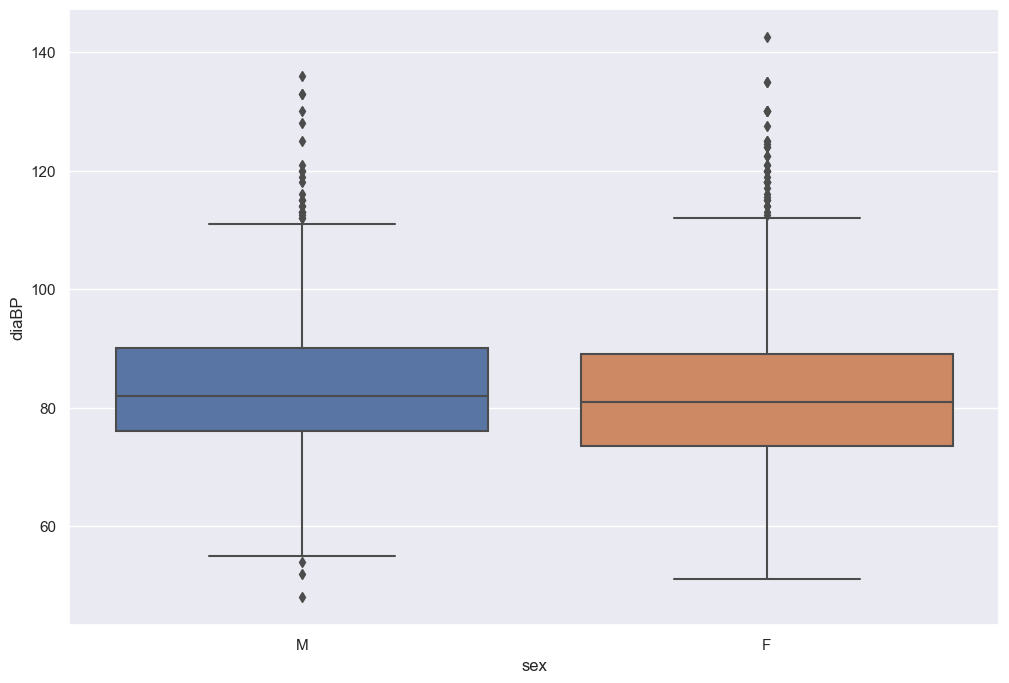

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='sex', y='diaBP', data=bp_data)

<AxesSubplot:xlabel='is_smoking', ylabel='diaBP'>

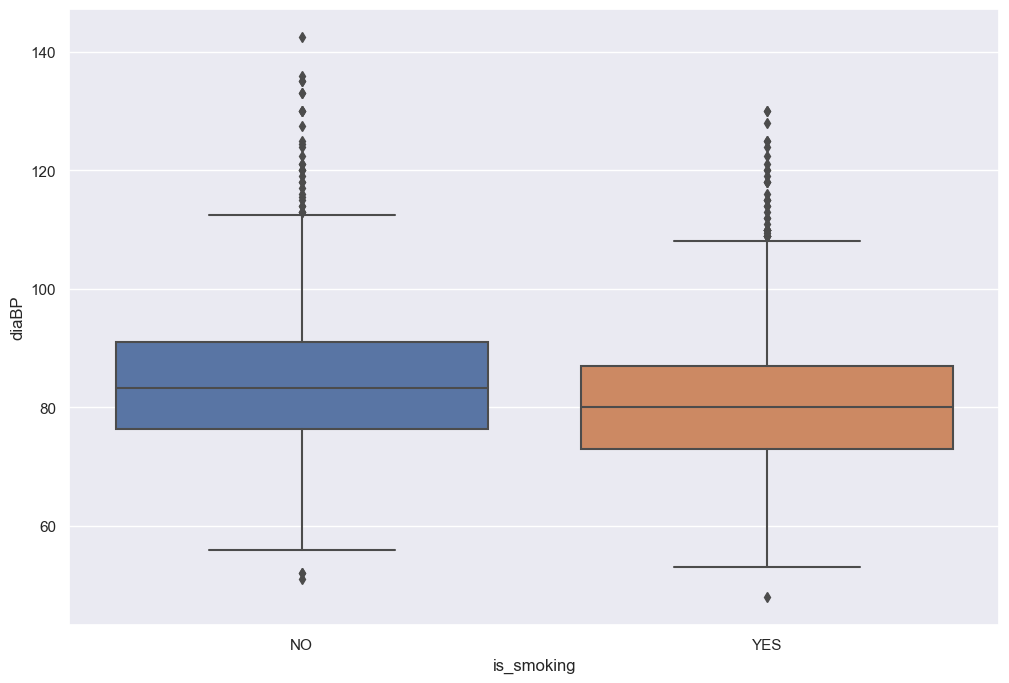

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_smoking', y='diaBP', data=bp_data) #is smoking a une influence sur diabp ?

In [16]:
bp_corr = bp_data.corr(method='spearman')
bp_corr

,age,education,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
age,1.000000,-0.188446,-0.204252,0.050761,0.110026,0.306954,0.229036,0.151229,0.011562,0.106081
education,-0.188446,1.000000,0.027388,-0.025668,-0.060679,-0.022693,-0.064203,-0.142068,-0.049372,-0.018194
cigsPerDay,-0.204252,0.027388,1.000000,-0.053543,-0.051918,-0.037292,-0.105820,-0.137484,0.064169,-0.094240
prevalentStroke,0.050761,-0.025668,-0.053543,1.000000,0.013866,0.004797,0.057746,0.014857,-0.012818,0.013458
diabetes,0.110026,-0.060679,-0.051918,0.013866,1.000000,0.053037,0.057915,0.077671,0.045870,0.215581
totChol,0.306954,-0.022693,-0.037292,0.004797,0.053037,1.000000,0.190048,0.151337,0.090829,0.039553
diaBP,0.229036,-0.064203,-0.105820,0.057746,0.057915,0.190048,1.000000,0.382744,0.176149,0.056180
BMI,0.151229,-0.142068,-0.137484,0.014857,0.077671,0.151337,0.382744,1.000000,0.068100,0.072622
heartRate,0.011562,-0.049372,0.064169,-0.012818,0.045870,0.090829,0.176149,0.068100,1.000000,0.096382
glucose,0.106081,-0.018194,-0.094240,0.013458,0.215581,0.039553,0.056180,0.072622,0.096382,1.000000


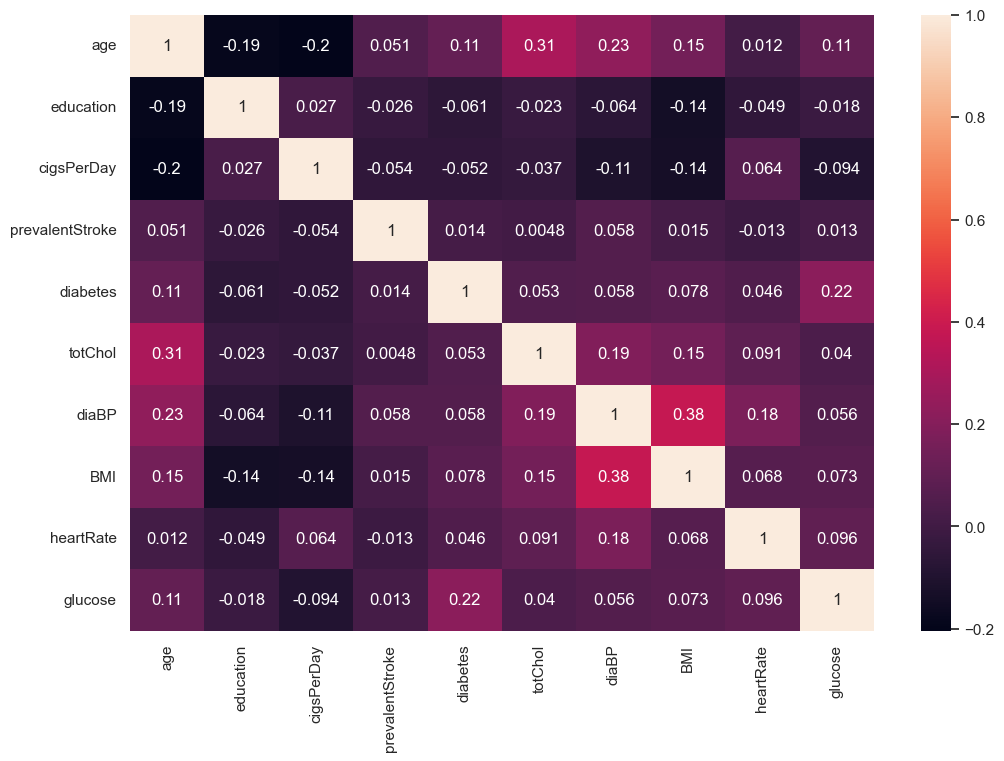

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(bp_corr, annot=True)
plt.show()

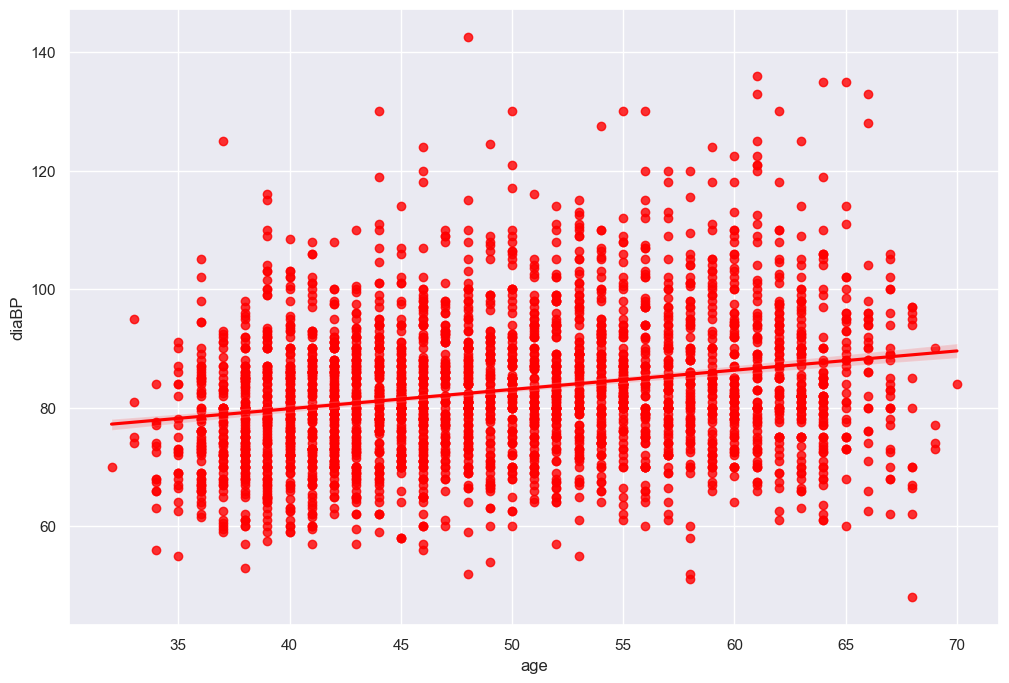

In [18]:
f, ax = plt.subplots(figsize=(12, 8))
sns.regplot(data=bp_data, x='age', y='diaBP', color='red')
plt.show()

In [19]:
label_encoding = preprocessing.LabelEncoder()

bp_data['sex'] = label_encoding.fit_transform(bp_data['sex'].astype(str))
bp_data['is_smoking'] = label_encoding.fit_transform(bp_data['is_smoking'].astype(str))

bp_data.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1,36,4.0,1,0,0.0,0,0,212.0,98.0,29.77,72.0,75.0
2,46,1.0,0,1,10.0,0,0,250.0,71.0,20.35,88.0,94.0
3,50,1.0,1,1,20.0,0,0,233.0,88.0,28.26,68.0,94.0
4,64,1.0,0,1,30.0,0,0,241.0,85.0,26.42,70.0,77.0
5,61,3.0,0,0,0.0,0,0,272.0,121.0,32.80,85.0,65.0


In [20]:
bp_data['cigsPerDay'] = bp_data['cigsPerDay'].astype(int)
bp_data['education'] = bp_data['education'].astype(int)

bp_data.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1,36,4,1,0,0,0,0,212.0,98.0,29.77,72.0,75.0
2,46,1,0,1,10,0,0,250.0,71.0,20.35,88.0,94.0
3,50,1,1,1,20,0,0,233.0,88.0,28.26,68.0,94.0
4,64,1,0,1,30,0,0,241.0,85.0,26.42,70.0,77.0
5,61,3,0,0,0,0,0,272.0,121.0,32.80,85.0,65.0


In [21]:
bp_data.to_csv('bp_data_processed.csv', index=False)

In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [23]:
bp_data = pd.read_csv('bp_data_processed.csv')

In [24]:
X = bp_data.drop('diaBP', axis=1)
y = bp_data['diaBP']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [26]:
X_train[['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,2341.0,49.664673,8.620532,32.00,42.00,49.00,57.00,70.00
cigsPerDay,2341.0,8.999146,11.860442,0.00,0.00,0.00,20.00,70.00
totChol,2341.0,236.818881,44.038848,113.00,207.00,234.00,263.00,600.00
BMI,2341.0,25.726467,4.074252,15.96,22.99,25.33,27.97,51.28
heartRate,2341.0,75.860316,11.958713,45.00,68.00,75.00,83.00,140.00
glucose,2341.0,82.115762,24.485506,40.00,71.00,78.00,87.00,394.00


In [27]:
X_train_numerical = X_train[['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']]
X_test_numerical = X_test[['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']]

In [28]:
X_train_categorical = X_train[['education', 'sex', 'is_smoking', 'prevalentStroke', 'diabetes']]
X_test_categorical = X_test[['education', 'sex', 'is_smoking', 'prevalentStroke', 'diabetes']]

In [29]:
scaler = StandardScaler()
X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train_numerical),
                                columns=X_train_numerical.columns)

X_test_numerical = pd.DataFrame(scaler.fit_transform(X_test_numerical),
                                columns=X_test_numerical.columns)

In [30]:
X_train_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2341.0,-2.924235e-16,1.000214,-2.049577,-0.889308,-0.077120,0.851095,2.359445
cigsPerDay,2341.0,-3.484979e-16,1.000214,-0.758915,-0.758915,-0.758915,0.927723,5.144318
totChol,2341.0,8.090733e-17,1.000214,-2.812184,-0.677249,-0.064023,0.594628,8.248597
BMI,2341.0,-4.592653e-16,1.000214,-2.397631,-0.671793,-0.097331,0.550779,6.273297
heartRate,2341.0,4.435320e-16,1.000214,-2.581123,-0.657428,-0.071956,0.597155,5.364573
glucose,2341.0,-4.752001e-17,1.000214,-1.720396,-0.454070,-0.168126,0.199517,12.740226


In [31]:
X_train_categorical.reset_index(drop=True, inplace=True)
X_train_numerical.reset_index(drop=True, inplace=True)

X_train = pd.concat([X_train_numerical, X_train_categorical], axis=1)

X_train.head()

,age,cigsPerDay,totChol,BMI,heartRate,glucose,education,sex,is_smoking,prevalentStroke,diabetes
0,-1.005335,-0.758915,-0.699961,-0.853460,0.764433,-0.127276,4,0,0,0,0
1,1.663284,0.506063,1.048869,-1.118596,-0.322873,-0.576618,2,0,1,0,0
2,0.503015,-0.758915,0.821748,0.818370,2.855406,-0.372372,1,0,0,0,0
3,-1.353416,-0.758915,0.049538,1.905918,-0.071956,-0.086427,2,0,0,0,0
4,0.503015,-0.505919,-1.449459,0.118705,-0.071956,-0.576618,1,1,1,0,0


In [32]:
X_test_categorical.reset_index(drop=True, inplace=True)
X_test_numerical.reset_index(drop=True, inplace=True)

X_test = pd.concat([X_test_numerical, X_test_categorical], axis=1)

In [33]:
def build_model(regressor, X_train, y_train, X_test, y_test):
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    training_score = model.score(X_train, y_train)
    testing_score = model.score(X_test, y_test)
    
    res_dict = {'train score': training_score, 'test score': testing_score}
    return res_dict

In [34]:
def performance_metrics_report():
    for key in report_log:
        print('_' * 50)
        print('Regression model -', key)
        print('_' * 50)
        print()
        for score in report_log[key]:
            print(score, report_log[key][score])

go

In [35]:
report_log = dict()

In [36]:
report_log['linear regression'] = build_model(LinearRegression(), X_train, y_train, X_test, y_test)
performance_metrics_report()

__________________________________________________
Regression model - linear regression
__________________________________________________

train score 0.20658019944281814
test score 0.26069373802898543


In [37]:
report_log['kneighbors'] = build_model(KNeighborsRegressor(), X_train, y_train, X_test, y_test)
performance_metrics_report()

__________________________________________________
Regression model - linear regression
__________________________________________________

train score 0.20658019944281814
test score 0.26069373802898543
__________________________________________________
Regression model - kneighbors
__________________________________________________

train score 0.3658631969080023
test score 0.13286429693836954


In [38]:
report_log['SVR'] = build_model(SVR(), X_train, y_train, X_test, y_test)
performance_metrics_report()

__________________________________________________
Regression model - linear regression
__________________________________________________

train score 0.20658019944281814
test score 0.26069373802898543
__________________________________________________
Regression model - kneighbors
__________________________________________________

train score 0.3658631969080023
test score 0.13286429693836954
__________________________________________________
Regression model - SVR
__________________________________________________

train score 0.20313810618657524
test score 0.2272440869205079


In [39]:
report_log['RF'] = build_model(RandomForestRegressor(), X_train, y_train, X_test, y_test)
performance_metrics_report()

__________________________________________________
Regression model - linear regression
__________________________________________________

train score 0.20658019944281814
test score 0.26069373802898543
__________________________________________________
Regression model - kneighbors
__________________________________________________

train score 0.3658631969080023
test score 0.13286429693836954
__________________________________________________
Regression model - SVR
__________________________________________________

train score 0.20313810618657524
test score 0.2272440869205079
__________________________________________________
Regression model - RF
__________________________________________________

train score 0.8825472462726521
test score 0.22983331264988283


#### Conclusion : les algos testés ne sont pas très performants... -> XGBoost ? -> réseaux de neurones ?